# Exercise Program 3 
EP3 was created to perform a Finite Elements Method to find the temperature distribution in a heated computer microchip.

### Importing modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Validation Exercise 

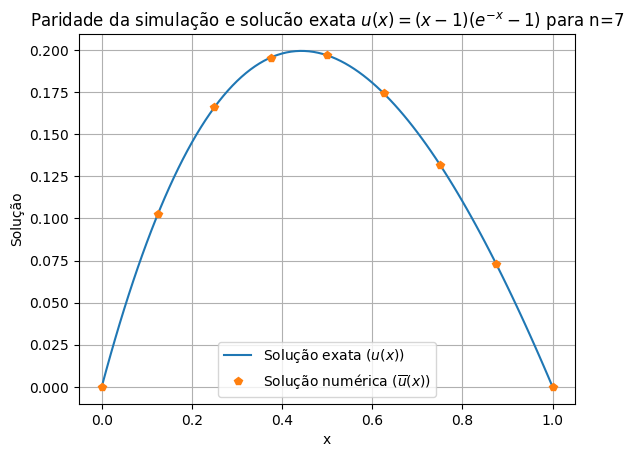

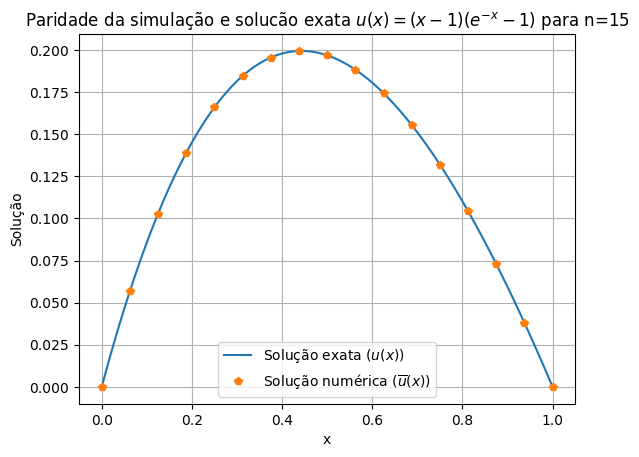

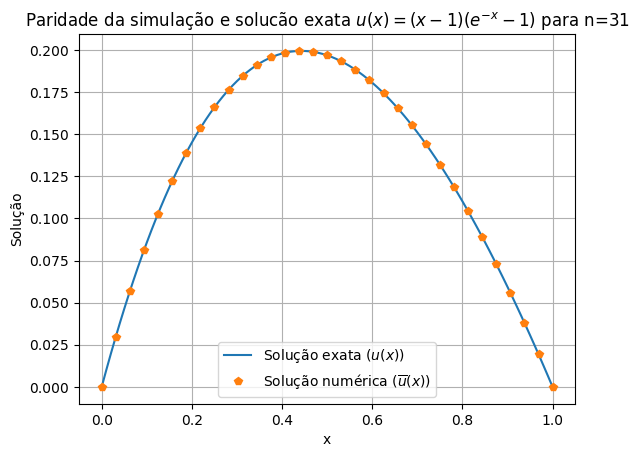

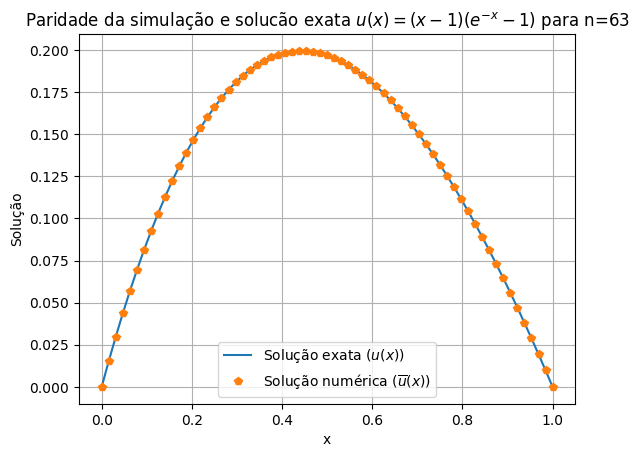

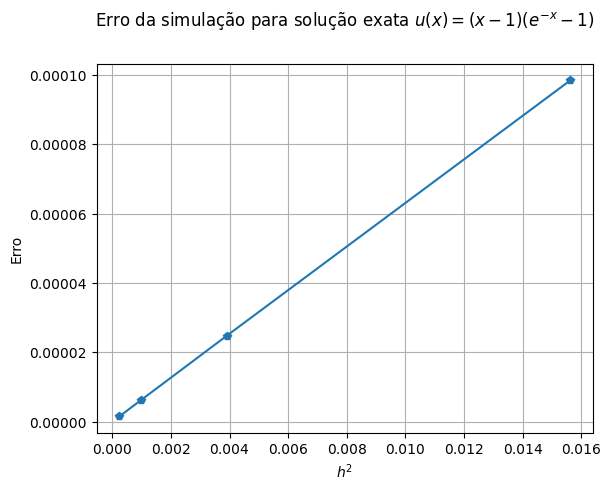

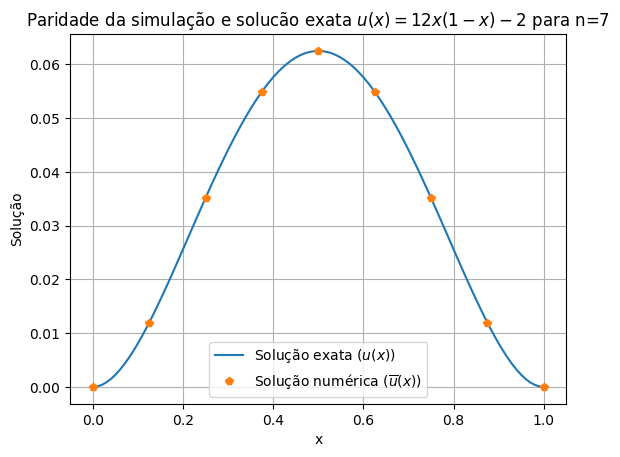

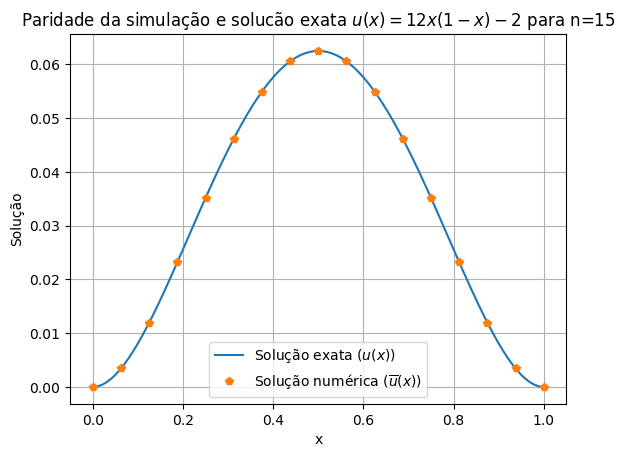

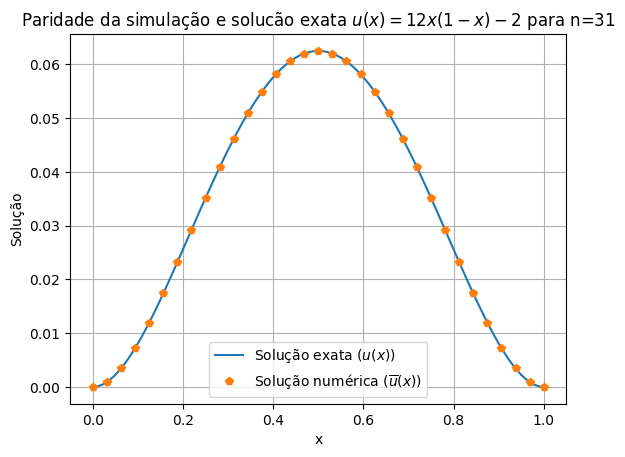

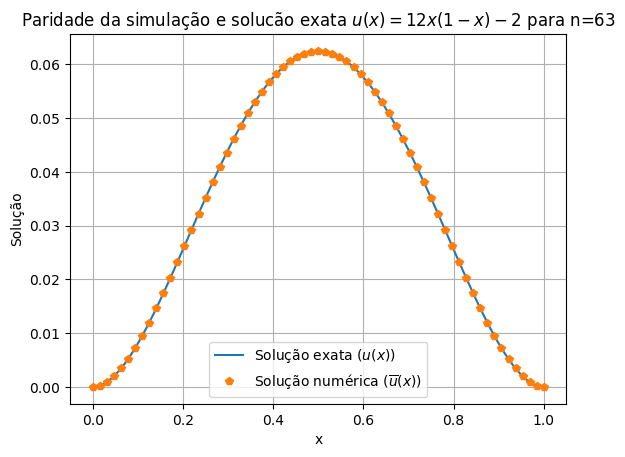

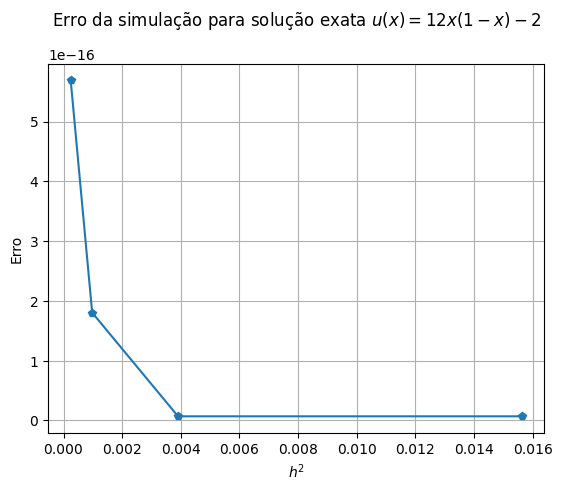

In [3]:
#EXERCÍCIO DE VALIDAÇÃO
N=[7,15,31,63]
validacao(N,0,0,1,lambda x: 0, lambda x: np.exp(x)+1,lambda x:0,lambda x: np.exp(x),lambda x: (x-1)*(np.exp(-x)-1),'$u(x)=(x-1)(e^{-x}-1)$')
validacao(N,0,0,1,lambda x: 0, lambda x: 12*x*(1-x)-2,lambda x:0,lambda x: 1,lambda x: (x**2)*(1-x)**2,'$u(x)=12x(1-x)-2$')

## Exercises with K constant

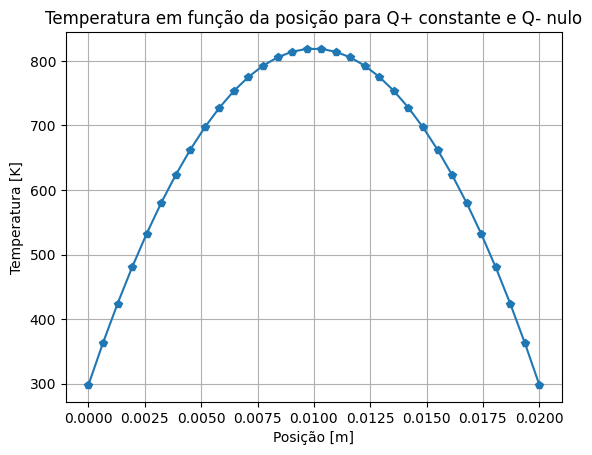

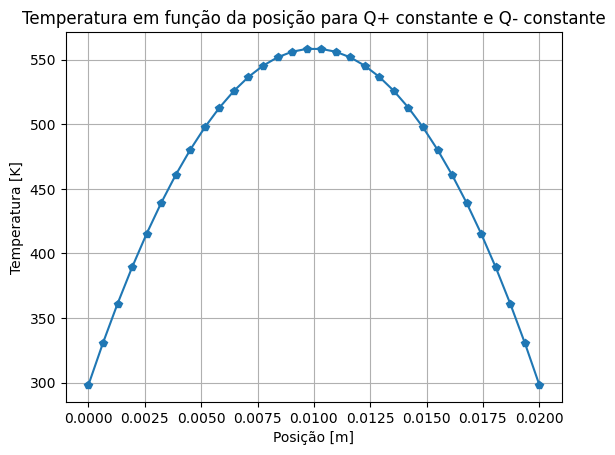

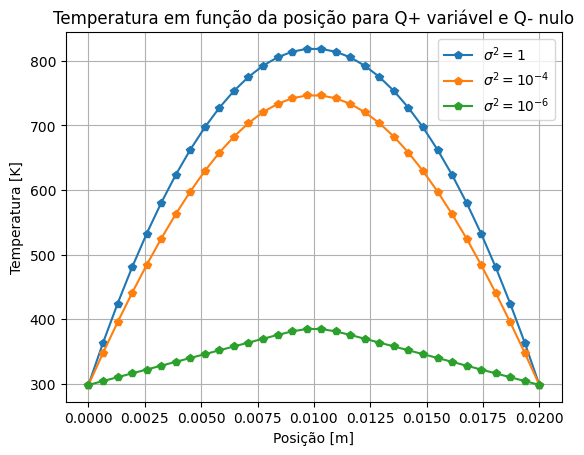

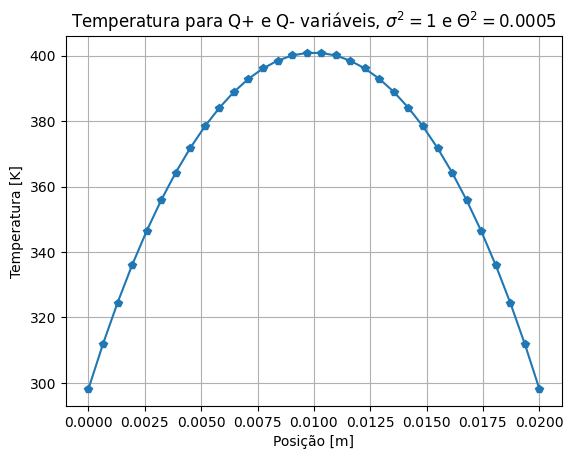

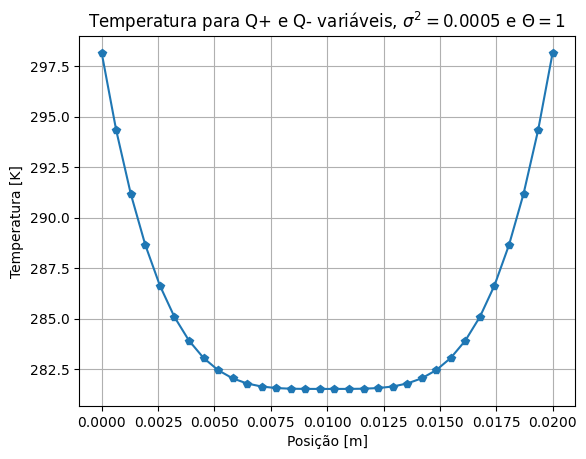

In [4]:
#EXERCÍCIOS PARA K CONSTANTE 
#CONDIÇÕES NAO HOMOGENEAS - L=20mm, n=100, k=3.6 W/mK a=b=293.15K, P=30V V=20*20*2 mm^3
#Caso 1 - Sendo Q+ e Q- constantes
#Caso 1a - Q+=P/V e Q-=0
L=0.02
n=30
k=3.6
T_caso_1a=fourier_fem(25+273.15,25+273.15,L,n,lambda x:0,lambda x:30/(8*(10**(-7))),lambda x:0,lambda x: k)
plot_temp_pos(L,n,[T_caso_1a],'Temperatura em função da posição para Q+ constante e Q- nulo','')

#Caso 1b - Q+=P/V e Q-=15/V
T_caso_1b=fourier_fem(25+273.15,25+273.15,L,n,lambda x:0,lambda x:30/(8*(10**(-7))),lambda x: 15/(8*(10**(-7))),lambda x: k)
plot_temp_pos(L,n,[T_caso_1b],'Temperatura em função da posição para Q+ constante e Q- constante','')

#Caso 2 - Sendo Q+ dado pela expressão disponível no enunciado e Q- nulo
Q0=30/(8*(10**(-7)))
T_caso_2a=fourier_fem(25+273.15,25+273.15,L,n,lambda x:0,lambda x: Q0*np.exp(-((x-L/2)**2)/1),lambda x:0,lambda x: k)
T_caso_2b=fourier_fem(25+273.15,25+273.15,L,n,lambda x:0,lambda x: Q0*np.exp(-((x-L/2)**2)/(10**(-4))),lambda x:0,lambda x: k)
T_caso_2c=fourier_fem(25+273.15,25+273.15,L,n,lambda x:0,lambda x: Q0*np.exp(-((x-L/2)**2)/(10**(-6))),lambda x:0,lambda x: k)
plot_temp_pos(L,n,[T_caso_2a,T_caso_2b,T_caso_2c],'Temperatura em função da posição para Q+ variável e Q- nulo',['$\sigma^2=1$','$\sigma^2=10^{-4}$','$\sigma^2=10^{-6}$'])

#Caso 3 - Q+ e Q- dados pelo expressão disponível no enunciado 
Q0_pos=30/(8*(10**(-7)))
Q0_neg=15/(8*(10**(-7)))
theta_qua=0.0005
s_qua=1
Q_ger=lambda x: Q0_pos*np.exp(-((x-L/2)**2)/s_qua)
Q_dis=lambda x: Q0_neg*(np.exp(-((x)**2/theta_qua))+np.exp(-((x-L)**2)/theta_qua))
T_caso_3a=fourier_fem(25+273.15,25+273.15,L,n,lambda x:0,Q_ger,Q_dis,lambda x: k)
plot_temp_pos(L,n,[T_caso_3a],'Temperatura para Q+ e Q- variáveis, $\sigma^2=1$ e $\Theta^2=0.0005$','')
theta_qua=1
s_qua=0.0005
T_caso_3b=fourier_fem(25+273.15,25+273.15,L,n,lambda x:0,Q_ger,Q_dis,lambda x: k)
plot_temp_pos(L,n,[T_caso_3b],'Temperatura para Q+ e Q- variáveis, $\sigma^2=0.0005$ e $\Theta=1$','')

### Exercises with variable K 

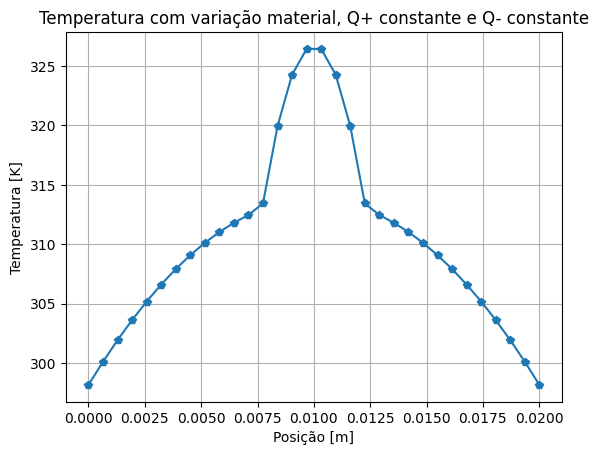

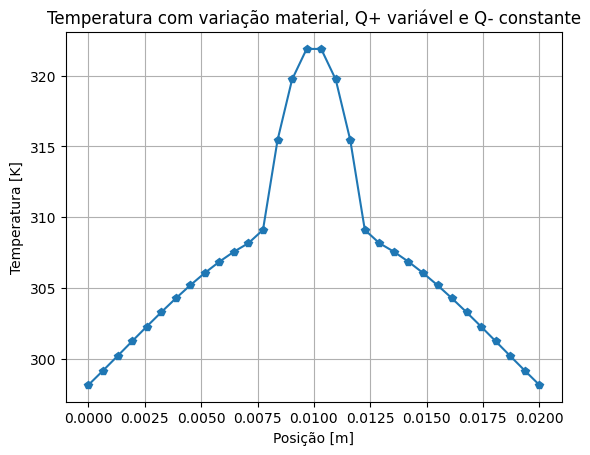

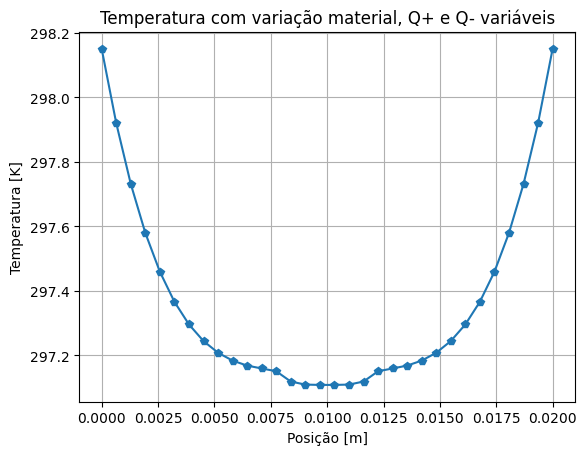

In [5]:
#PROBLEMA COM K VARIÁVEL
#Caso 1 - Q+ constante e Q- constante 
ks=3.6
ka=60
d=0.0025
T_k_variavel1=fourier_fem(25+273.15,25+273.15,L,n,lambda x:0,lambda x:30/(8*(10**(-7))),lambda x:15/(8*(10**(-7))),lambda x: ks if L/2-d<x<L/2+d else ka)
plot_temp_pos(L,n,[T_k_variavel1],'Temperatura com variação material, Q+ constante e Q- constante','')
#Caso 2 - Q+ dado pelo enunciado e Q- constante 
s_qua=10**(-4)
Q_ger=lambda x: Q0_pos*np.exp(-((x-L/2)**2)/s_qua)
T_k_variavel2=fourier_fem(25+273.15,25+273.15,L,n,lambda x:0,Q_ger,lambda x:15/(8*(10**(-7))),lambda x: ks if L/2-d<x<L/2+d else ka)
plot_temp_pos(L,n,[T_k_variavel2],'Temperatura com variação material, Q+ variável e Q- constante','')
#Caso 3 - Q+ e Q- dados pelo enunciado
theta_qua=1
s_qua=0.0005
Q_ger=lambda x: Q0_pos*np.exp(-((x-L/2)**2)/s_qua)
Q_dis=lambda x: Q0_neg*(np.exp(-((x)**2/theta_qua))+np.exp(-((x-L)**2)/theta_qua))
T_k_variavel3=fourier_fem(25+273.15,25+273.15,L,n,lambda x:0,Q_ger,Q_dis,lambda x: ks if L/2-d<x<L/2+d else ka)
plot_temp_pos(L,n,[T_k_variavel3],'Temperatura com variação material, Q+ e Q- variáveis','') 

### Additional functions

In [2]:
def fourier_fem(a,b,L,n,q,Q_ger,Q_dis,k):
    h=L/(n+1)
    f=lambda x: Q_ger(x)-Q_dis(x)
    #x0=0, x_n+1=L
    X=np.arange(0,L+h,h)
    D_1,D_2,D_3,D_4,D_5,D_6=np.zeros(n-1),np.zeros(n),np.zeros(n),np.zeros(n+1),np.zeros(n),np.zeros(n)
    alfa1,alfa2,alfa0=np.zeros(n),np.zeros(n),np.zeros(n)
    #Definindo Q2,n; Q3,n; Q4,n; Q4,n+1; Q5,n; Q6,n
    D_2[n-1]=((1/h)**2)*integracao_gaussiana(X[n-1],X[n],lambda x: ((x-X[n-1])**2)*q(x))
    D_3[n-1]=((1/h)**2)*integracao_gaussiana(X[n],X[n+1],lambda x: ((X[n+1]-x)**2)*q(x))
    D_4[n-1]=((1/h)**2)*integracao_gaussiana(X[n-1],X[n],lambda x: k(x))
    D_4[n]=((1/h)**2)*integracao_gaussiana(X[n],X[n+1],lambda x: k(x))
    D_5[n-1]=(1/h)*integracao_gaussiana(X[n-1],X[n],lambda x: (x-X[n-1])*f(x))
    D_6[n-1]=(1/h)*integracao_gaussiana(X[n],X[n+1],lambda x: (X[n+1]-x)*f(x))
    #Definindo Q1,n; Q2,i; Q3,n; Q4,n; Q5,n; Q6,n; 
    #X[i] tem uma peculiaridade já que existe X[0]
    for i in range(1,n):
        D_1[i-1]=((1/h))**2*integracao_gaussiana(X[i],X[i+1],lambda x: (X[i+1]-x)*(x-X[i])*q(x))
        D_2[i-1]=((1/h))**2*integracao_gaussiana(X[i-1],X[i],lambda x: ((x-X[i-1])**2)*q(x))
        D_3[i-1]=((1/h)**2)*integracao_gaussiana(X[i],X[i+1],lambda x: ((X[i+1]-x)**2)*q(x))
        D_4[i-1]=((1/h)**2)*integracao_gaussiana(X[i-1],X[i],lambda x: k(x))
        D_5[i-1]=(1/h)*integracao_gaussiana(X[i-1],X[i],lambda x: (x-X[i-1])*f(x))
        D_6[i-1]=(1/h)*integracao_gaussiana(X[i],X[i+1],lambda x: (X[i+1]-x)*f(x))
    for i in range(1,n):
        alfa1[i-1]=D_4[i-1]+D_4[i]+D_2[i-1]+D_3[i-1]
        alfa2[i-1]=-D_4[i]+D_1[i-1]
        #loop para i=2,3,...,n
        alfa0[i]=-D_4[i]+D_1[i-1]
    alfa0[0]=0
    alfa1[n-1]=D_4[n-1]+D_4[n]+D_2[n-1]+D_3[n-1]
    alfa2[n-1]=0
    beta=D_5+D_6
    c=solucao_sistema([alfa0,alfa1,alfa2],beta)
    sum_phi=np.zeros(n)
    for i in range(1,n+1):
        #calculo phi_i
        for j in range(1,n+1):
            if X[i]>X[j-1] and X[i]<=X[j]:
                phi=(1/h)*(X[i]-X[j-1])
            elif X[i]>X[j] and X[i]<=X[j+1]:
                phi=(1/h)*(X[j+1]-X[i])
            else:
                phi=0
            sum_phi[i-1]+=c[j-1]*phi
        #Adicionar casos não homogêneos 
        sum_phi[i-1]+=a+((b-a)/L)*X[i]
    sum_phi=np.insert(sum_phi,0,a)
    sum_phi=np.insert(sum_phi,n+1,b)
    return sum_phi

def validacao(N,a,b,L,q,Q_ger,Q_dis,k,u,str_sol_exata):
    h_qua=np.zeros(len(N))
    error=np.zeros(len(N))
    X_exata=np.arange(0,L+0.01,0.01)
    sol_plot=np.zeros(len(X_exata))
    for l in range(len(X_exata)):
       sol_plot[l]=u(X_exata[l])  
    for i in range(len(N)):
        h=L/(N[i]+1)
        sol_exata=np.zeros(N[i]+2)
        X=np.arange(0,L+h,h)
        h_qua[i]=(L/(N[i]+1))**2
        sol_numerica=fourier_fem(a,b,L,N[i],q,Q_ger,Q_dis,k)
        for j in range(0,N[i]+1):
            sol_exata[j]=u(X[j])  
        error[i]=max(abs(sol_numerica-sol_exata))
        plt.plot(X_exata,sol_plot,'-',label="Solução exata ($u(x)$)")
        plt.plot(X,sol_numerica,'p',label="Solução numérica ($\overline{u}(x)$)")
        plt.legend()
        plt.title('Paridade da simulação e solucão exata '+str_sol_exata+' para n=%i'%N[i])
        plt.xlabel('x')
        plt.ylabel('Solução')
        plt.grid()
        plt.show()
    plt.plot(h_qua, error,'-p')
    plt.title('Erro da simulação para solução exata '+str_sol_exata,y=1.08)
    plt.xlabel('$h^2$')
    plt.ylabel('Erro')
    plt.grid()
    plt.show()

def plot_temp_pos(L,n,T,title,legenda):
    h=L/(n+1)
    X=np.arange(0,L+h,h)
    if len(T)>1: 
        for i in range(len(T)):
            plt.plot(X,T[i],'-p',label=legenda[i])
            plt.legend()
    else: 
        plt.plot(X,T[0],'-p')
    plt.title(title)
    plt.xlabel('Posição [m]')
    plt.ylabel('Temperatura [K]')
    plt.grid()
    plt.show()

def decomposicaoLU(A): 
    a,b,c=A[0],A[1],A[2]
    U,L=np.zeros(len(A[0])),np.zeros(len(A[0])) #cria os vetores U e L vazios
    #Valores iniciais 
    U[0]=b[0]
    L[0]=1
    #Laço para encontrar L,U, assim como disponibilizado no enunciado
    for i in range(1,len(A[0])):
        L[i]=a[i]/U[i-1]
        U[i]=b[i]-L[i]*c[i-1]
    return L,U

def solucao_sistema(A,d):
    LU=decomposicaoLU(A)
    L,U=LU[0],LU[1]
    x,y=np.zeros(len(d)),np.zeros(len(d)) #cria os vetores x e y vazios
    y[0]=d[0]
    for i in range(1,len(d)):
        y[i]=d[i]-L[i]*y[i-1]
    x[len(d)-1]=y[len(d)-1]/U[len(d)-1]
    for i in range(len(d)-2,-1,-1):
        x[i]=(y[i]-A[2][i]*x[i+1])/U[i]
    return x

def integracao_gaussiana(a,b,f):
    W=(1,1) #pesos
    p=(-1/(np.sqrt(3)),1/(np.sqrt(3))) #nós
    n=2
    I1=0
    for i in range(n):
        x=((b-a)*p[i]+(a+b))/2
        u=(b-a)*W[i]/2
        I1+=u*f(x)
    return I1